In [1]:
#lancer la communication asynchrone avec thymio
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node fbffd2bf-1e6b-4546-b240-60eed16c9df4

In [2]:
# Premade libraries
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, Point, LineString

In [3]:
# Homemade functions
import Vision.vision as vs
import robot as rbt
import Global_Navigation.global_navigation as glb
import Motion_Control.thymio_control as ctrl

## Mise a niveau des template

In [ ]:
#cap = cv2.VideoCapture(1)
cap = cv2.VideoCapture(0)
vs.get_image(cap)
cap.release()

In [ ]:
Robot = rbt.RobotNav()
print(Robot.test("wewe"))

In [4]:
# Main
# Data
margin = 30


# Initialisation
# Create an instance of our robot
thymio = rbt.RobotNav()
# Start the video capture
#cap = cv2.VideoCapture(1)
cap = cv2.VideoCapture(0)
img = vs.get_image(cap)

center1
(430.0, 197.0)
center2
(429.0, 230.0)
shapes
start coord
(429.5, 213.5)
(420.0, 38.0)


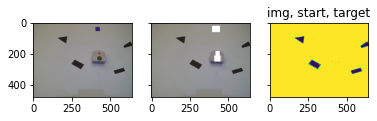

100%|██████████| 2/2 [00:00<00:00, 295.63it/s]


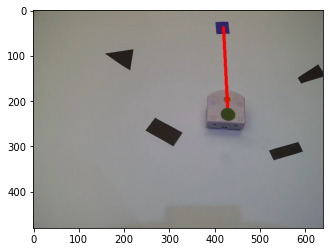

state updated
elem
-1.5405025668761214
(420.00, 38.00)
-1.5405025668761214
(420.00, 38.00)
-1.4501726582147938
(420.00, 38.00)
-1.2679114584199251
(420.00, 38.00)
-1.1071487177940904
(420.00, 38.00)
-0.6489955589965009
(420.00, 38.00)
-0.14888994760949725
(420.00, 38.00)
0.3217505543966422
(420.00, 38.00)
0.5880026035475675
(420.00, 38.00)
0.9380474917927135
(420.00, 38.00)
1.5707963267948966
(420.00, 38.00)
2.0205559398647357
(420.00, 38.00)
2.704965493776252
(420.00, 38.00)
3.0535852800620527
(420.00, 38.00)
-2.6651252341160867
(420.00, 38.00)
-2.295046327543044
(420.00, 38.00)
-2.439335722080786
(420.00, 38.00)
-2.766321830733836
(420.00, 38.00)
2.9325697107835285
(420.00, 38.00)
2.579671091332978
(420.00, 38.00)
2.704965493776252
(420.00, 38.00)
3.0535852800620527
(420.00, 38.00)
-2.677945044588987
(420.00, 38.00)
-2.1421338066285234
(420.00, 38.00)
-2.376599820878883
(420.00, 38.00)
-2.938547436336328
(420.00, 38.00)
3.024483909022929
(420.00, 38.00)
2.44293282886833
(420.00, 38.0

In [5]:
while cap.isOpened():
    ret, frame = cap.read()
    if thymio.get_state() == 0:
        thymio.initialisation_step(img, margin, True)
        thymio.increase_step()
        thymio.set_state(1)
        print(thymio.test("elem"))
    elif thymio.get_state() == 1:
        # We use the position determined by the camera
        position, st = vs.detect_start(frame, False, False)
        frame = glb.draw_thymio(frame, position)
        frame = glb.draw_path(frame, thymio.get_path())
        # We update the position of the robot
        if position is not None:
            #print("in")
            thymio.update_position_cam(st)
            #print("avant st")
            #print(st)
        else:
            thymio.update_position_kalman()
        """
        # We check if the robot encounter an obstacle
            to be implemented
        """
        # We try to reach the next goal
        
        geometry = thymio.get_geometry()
        print(geometry[2])
       # print(geometry)
        step = thymio.get_crt_step()
        path = thymio.get_path()
        print(path[step])
        ctrl.astolfi((geometry[0], geometry[1]), geometry[2], path[step], node) 
        #thymio.update_step_respo(15, False)

    elif thymio.get_state() == 2:
        ctrl.stop_motors(node)
        ctrl.leds_blink(node)
        print('out')
        break # Exits the code


    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



In [6]:
ctrl.stop_motors(node)